<a href="https://colab.research.google.com/github/jaunty0216/SomeAttempts/blob/main/AON%E6%B5%81%E7%A8%8B%E5%9C%96%E6%B8%AC%E8%A9%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get update
!sudo apt-get install fonts-noto-cjk

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,702 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,728 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/u

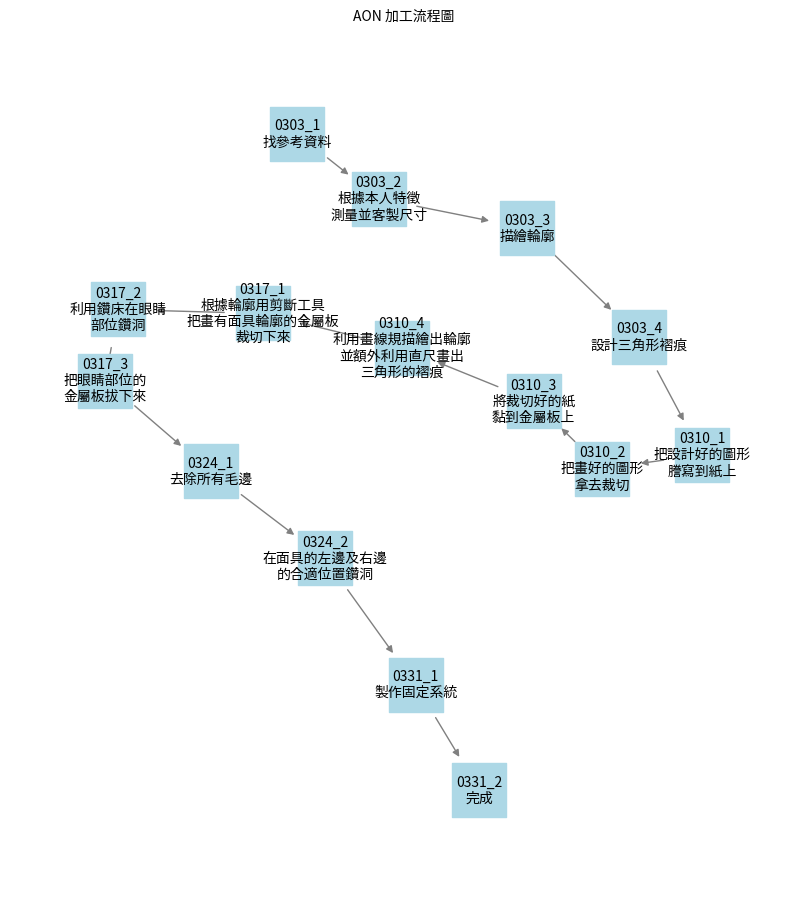

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
font_prop = fm.FontProperties(fname=font_path, size=10)

def draw_aon_process():


    # 定義加工活動的詳細內容
    task_labels = {
        "0303_1": "0303_1\n找參考資料",
        "0303_2": "0303_2\n根據本人特徵\n測量並客製尺寸",
        "0303_3": "0303_3\n描繪輪廓",
        "0303_4": "0303_4\n設計三角形褶痕",
        "0310_1": "0310_1\n把設計好的圖形\n謄寫到紙上",
        "0310_2": "0310_2\n把畫好的圖形\n拿去裁切",
        "0310_3": "0310_3\n將裁切好的紙\n黏到金屬板上",
        "0310_4": "0310_4\n利用畫線規描繪出輪廓\n並額外利用直尺畫出\n三角形的褶痕",
        "0317_1": "0317_1\n根據輪廓用剪斷工具\n把畫有面具輪廓的金屬板\n裁切下來",
        "0317_2": "0317_2\n利用鑽床在眼睛\n部位鑽洞",
        "0317_3": "0317_3\n把眼睛部位的\n金屬板拔下來",
        "0324_1": "0324_1\n去除所有毛邊",
        "0324_2": "0324_2\n在面具的左邊及右邊\n的合適位置鑽洞",
        "0331_1": "0331_1\n製作固定系統",
        "0331_2": "0331_2\n完成",
    }

    # 定義活動的依賴關係
    tasks = {
        "0303_1": [],
        "0303_2": ["0303_1"],
        "0303_3": ["0303_2"],
        "0303_4": ["0303_3"],
        "0310_1": ["0303_4"],
        "0310_2": ["0310_1"],
        "0310_3": ["0310_2"],
        "0310_4": ["0310_3"],
        "0317_1": ["0310_4"],
        "0317_2": ["0317_1"],
        "0317_3": ["0317_2"],
        "0324_1": ["0317_3"],
        "0324_2": ["0324_1"],
        "0331_1": ["0324_2"],
        "0331_2": ["0331_1"],
    }

    # 建立有向圖
    G = nx.DiGraph()
    for task, dependencies in tasks.items():
        G.add_node(task, label=task_labels[task])
        for dep in dependencies:
            G.add_edge(dep, task)

    # 繪製圖表
    width, height = 20/2.54, 22/2.54
    plt.figure(figsize=(width,height))  # 調整圖表大小
    pos = nx.spring_layout(G, k=0.3, seed=42)  # 調整節點間距
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=1550,
            node_color="lightblue", font_size=0.5, font_weight="bold", edge_color="gray",
            node_shape='s')

    # 設定中文字體
    for text in plt.gca().texts:
        text.set_fontproperties(font_prop)

    plt.title("AON 加工流程圖", fontproperties=font_prop)

    plt.margins(0.1)  # 調整圖表邊界

    plt.show()

# 執行繪製流程圖的函數
draw_aon_process()
